In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
import pickle



In [2]:
data=pd.read_csv('/content/CustomerChurn.csv')
data.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
1789,2586-CWXVV,Male,0,Yes,No,54,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,30.40,1621.35,No
6337,2696-ECXKC,Female,0,Yes,Yes,55,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,No,Mailed check,100.90,5448.6,No
6303,6308-CQRBU,Female,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Two year,No,Electronic check,109.25,7707.7,No
3026,6127-ISGTU,Female,0,Yes,No,16,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.95,1378.25,Yes
1926,6651-AZVTJ,Male,0,Yes,Yes,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.80,4872.45,Yes


In [3]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# Check Rows and Columns in this data

In [4]:
data.shape

(7043, 21)

# Check Information about Data

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Check duplicated values

In [6]:
data.duplicated().sum()

np.int64(0)

# Check Missing Values

In [7]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
data['Contract'].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [9]:
data['Contract'].value_counts()

,count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


# Removing Unneccessary columns

In [10]:
data=data.drop(['customerID'],axis=1)
data
#axis bcoz to drop column wise

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Exploring missing values

In [11]:
feature=['tenure','MonthlyCharges','totalCharges']
for col in data.columns:
  if col not in feature:
    print(col,data[col].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ['No' 'Yes']


In [12]:
data['TotalCharges']=data['TotalCharges'].replace({" ":"0.0"})


In [13]:
data['TotalCharges']=data['TotalCharges'].astype(float)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


# **EDA(exploratory data analysis) Performation:-**

# Visualizing Churn Rate

<Axes: xlabel='Churn'>

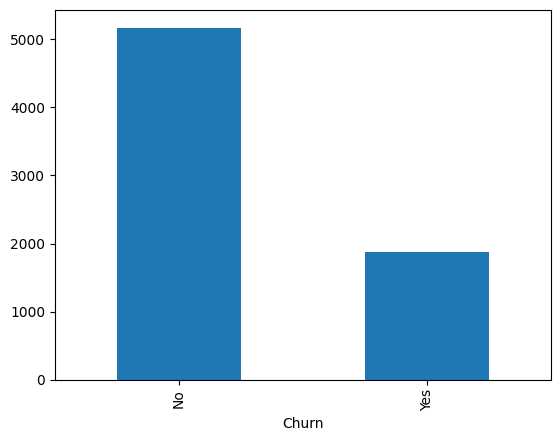

In [15]:
data['Churn'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'Churn Percent')

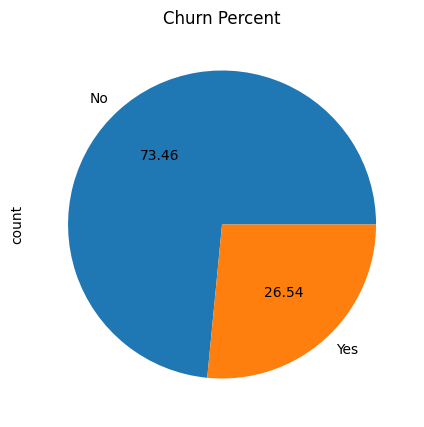

In [16]:
plt.figure(figsize=(5,5))
data['Churn'].value_counts().plot(kind='pie',autopct="%.2f")
plt.title("Churn Percent")



# Churn For Tenure

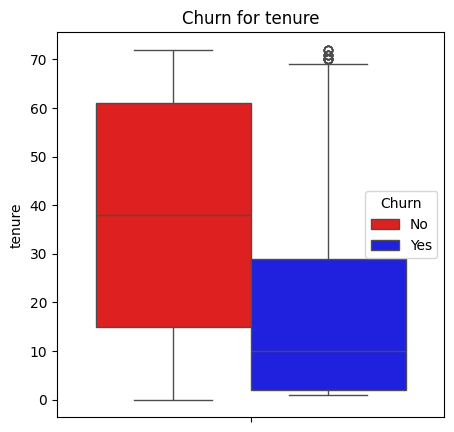

In [17]:
plt.figure(figsize=(5,5))
sns.boxplot(y='tenure',hue='Churn',data=data,palette=['red','blue'])
plt.title('Churn for tenure')
plt.show()

# KDE Plot for Churn Analysis

/tmp/ipython-input-2350169045.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax0=sns.kdeplot(data[data['Churn']=='No'][feature].dropna(),color='red',label='Churn: No',shade=True)
/tmp/ipython-input-2350169045.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax1=sns.kdeplot(data[data['Churn']=='Yes'][feature].dropna(),color='Blue',label='Churn: Yes',shade=True)


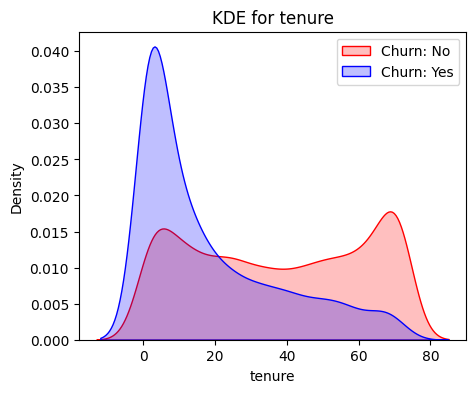

/tmp/ipython-input-2350169045.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax0=sns.kdeplot(data[data['Churn']=='No'][feature].dropna(),color='red',label='Churn: No',shade=True)
/tmp/ipython-input-2350169045.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax1=sns.kdeplot(data[data['Churn']=='Yes'][feature].dropna(),color='Blue',label='Churn: Yes',shade=True)


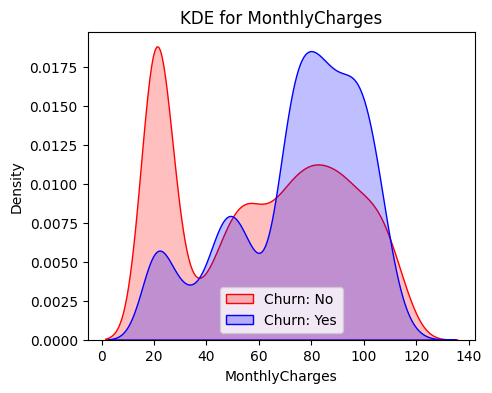

/tmp/ipython-input-2350169045.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax0=sns.kdeplot(data[data['Churn']=='No'][feature].dropna(),color='red',label='Churn: No',shade=True)
/tmp/ipython-input-2350169045.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  ax1=sns.kdeplot(data[data['Churn']=='Yes'][feature].dropna(),color='Blue',label='Churn: Yes',shade=True)


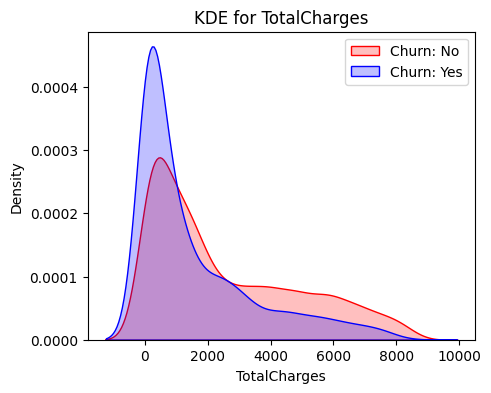

In [18]:
def kde(feature):
  plt.figure(figsize=(5,4))
  plt.title('KDE for {}'.format(feature))
  ax0=sns.kdeplot(data[data['Churn']=='No'][feature].dropna(),color='red',label='Churn: No',shade=True)
  ax1=sns.kdeplot(data[data['Churn']=='Yes'][feature].dropna(),color='Blue',label='Churn: Yes',shade=True)

  plt.legend()
  plt.show()

kde('tenure')
kde('MonthlyCharges')
kde('TotalCharges')

# Churn By Contract-Type

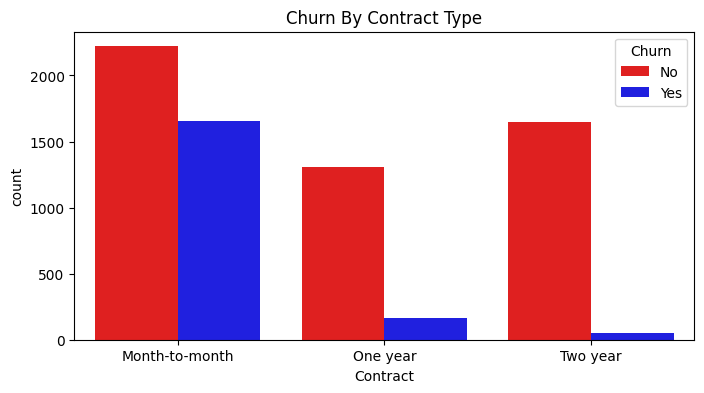

In [19]:
plt.figure(figsize=(8,4))
sns.countplot(x='Contract',hue='Churn',data=data,palette=['red','blue'])
plt.title('Churn By Contract Type')
plt.show()

# Churn By Monthly-Charges

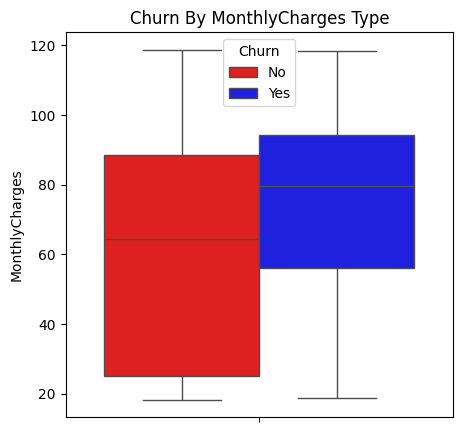

In [20]:
plt.figure(figsize=(5,5))
sns.boxplot(y='MonthlyCharges',hue='Churn',data=data,palette=['red','blue'])
plt.title('Churn By MonthlyCharges Type')
plt.show()

# Churn By Internet-Service-Type

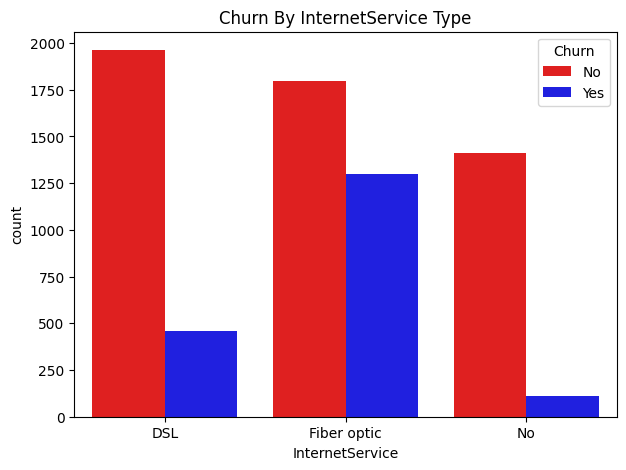

In [21]:
plt.figure(figsize=(7,5))
sns.countplot(x='InternetService',hue='Churn',data=data,palette=['red','blue'])
plt.title('Churn By InternetService Type')
plt.show()

# Churn By Payment-Method

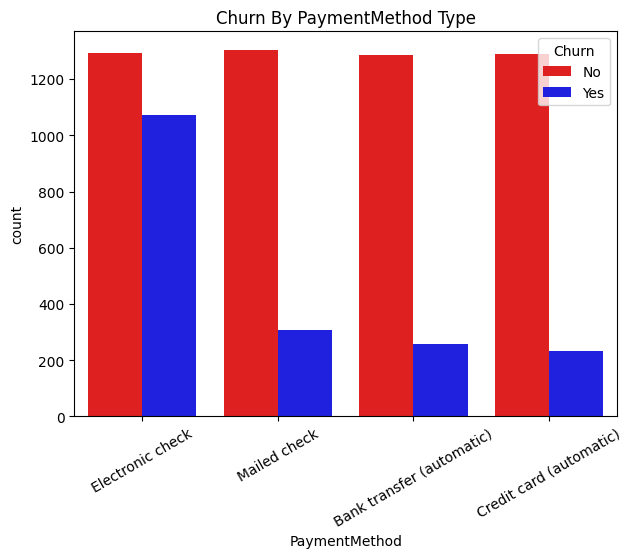

In [22]:
plt.figure(figsize=(7,5))
sns.countplot(x='PaymentMethod',hue='Churn',data=data,palette=['red','blue'])
plt.xticks(rotation=30)
plt.title('Churn By PaymentMethod Type')
plt.show()

# Correlation

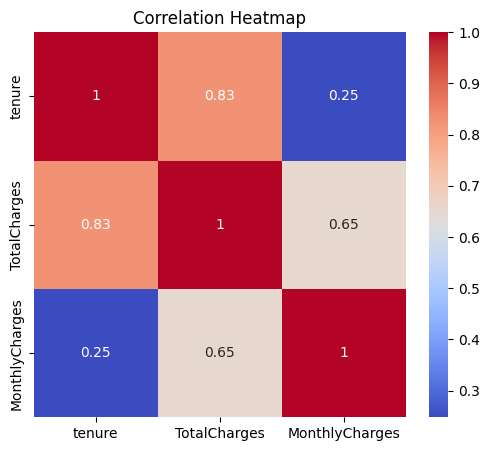

In [23]:
plt.figure(figsize=(6,5))
sns.heatmap(data[['tenure','TotalCharges','MonthlyCharges']].corr(),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Cleaning Categorical Columns

In [24]:
data['MultipleLines'].replace({'No phone service':'No'},inplace=True)
data['OnlineSecurity'].replace({'No internet service':'No'},inplace=True)
data['OnlineBackup'].replace({'No internet service':'No'},inplace=True)
data['DeviceProtection'].replace({'No internet service':'No'},inplace=True)
data['TechSupport'].replace({'No internet service':'No'},inplace=True)
data['StreamingTV'].replace({'No internet service':'No'},inplace=True)
data['StreamingMovies'].replace({'No internet service':'No'},inplace=True)



/tmp/ipython-input-3974335983.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['MultipleLines'].replace({'No phone service':'No'},inplace=True)
/tmp/ipython-input-3974335983.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

# Converting yes/no To Binary-Format(0/1)

In [25]:
colmn=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for i in colmn:
  data[i].replace({'Yes':1,'No':0},inplace=True)

/tmp/ipython-input-497803143.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[i].replace({'Yes':1,'No':0},inplace=True)
/tmp/ipython-input-497803143.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[i].replace({'Yes':1,'No':0},inplace=True)


In [26]:
data['gender'].replace({'Female':1,'Male':0},inplace=True)

/tmp/ipython-input-188846015.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['gender'].replace({'Female':1,'Male':0},inplace=True)
/tmp/ipython-input-188846015.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['gender'].replace({'Female':1,'Male':0},inplace=True)


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


# One-Hot Encoding

In [28]:
data1 = pd.get_dummies(data=data, columns=['InternetService','Contract','PaymentMethod'],dtype=int)
data1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [29]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

# **Scaling Numerical Features Using MinMaxScaler**

In [30]:
scaling_col=['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
data1[scaling_col]=scaler.fit_transform(data1[scaling_col])

In [31]:
for col in data1.columns:
  print(col,data1[col].unique())

gender [1 0]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [0.01388889 0.47222222 0.02777778 0.625      0.11111111 0.30555556
 0.13888889 0.38888889 0.86111111 0.18055556 0.22222222 0.80555556
 0.68055556 0.34722222 0.95833333 0.72222222 0.98611111 0.29166667
 0.16666667 0.41666667 0.65277778 1.         0.23611111 0.375
 0.06944444 0.63888889 0.15277778 0.97222222 0.875      0.59722222
 0.20833333 0.83333333 0.25       0.91666667 0.125      0.04166667
 0.43055556 0.69444444 0.88888889 0.77777778 0.09722222 0.58333333
 0.48611111 0.66666667 0.40277778 0.90277778 0.52777778 0.94444444
 0.44444444 0.76388889 0.51388889 0.5        0.56944444 0.08333333
 0.05555556 0.45833333 0.93055556 0.31944444 0.79166667 0.84722222
 0.19444444 0.27777778 0.73611111 0.55555556 0.81944444 0.33333333
 0.61111111 0.26388889 0.75       0.70833333 0.36111111 0.
 0.54166667]
PhoneService [0 1]
MultipleLines [0 1]
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
Strea

# Feature Splitting

In [32]:
x=data1.drop('Churn',axis=1)
y=data1['Churn']

In [33]:
x.shape

(7043, 26)

In [34]:
y.shape

(7043,)

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [36]:
x_train.shape,y_train.shape

((5634, 26), (5634,))

In [37]:
print(y_train.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64


# Handling Imbalanced data Using SMOTE

In [38]:
smote=SMOTE(random_state=42)
x_train,y_train=smote.fit_resample(x_train,y_train)

In [39]:
y_train.value_counts()

,count
Churn,
0,4138
1,4138


 # **Machine Learning Training and Predictions**

# Training and Evaluating using SVM(support vector machine) Model

In [40]:
svc_model=SVC(random_state=42)
svc_model.fit(x_train,y_train)
y_pred=svc_model.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,y_pred)*100)
print('confusion_matrix:\n',confusion_matrix(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred)*100)
print("Recall:", recall_score(y_test, y_pred)*100)
print("F1-score:", f1_score(y_test, y_pred)*100)

accuracy_score: 76.29524485450673
confusion_matrix:
 [[798 238]
 [ 96 277]]
Precision: 53.786407766990294
Recall: 74.26273458445041
F1-score: 62.387387387387385


# Training and Evaluating using RandomForest Model

In [41]:
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred=rf_model.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,y_pred)*100)
print('confusion_matrix:\n',confusion_matrix(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred)*100)
print("Recall:", recall_score(y_test, y_pred)*100)
print("F1-score:", f1_score(y_test, y_pred)*100)

accuracy_score: 77.35982966643009
confusion_matrix:
 [[842 194]
 [125 248]]
Precision: 56.10859728506787
Recall: 66.48793565683646
F1-score: 60.858895705521476


# Training and evaluating using Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
print('accuracy_score:',accuracy_score(y_test,y_pred)*100)
print('confusion_matrix:\n',confusion_matrix(y_test,y_pred))
print("Precision:", precision_score(y_test, y_pred)*100)
print("Recall:", recall_score(y_test, y_pred)*100)
print("F1-score:", f1_score(y_test, y_pred)*100)

accuracy_score: 73.38537970191625
confusion_matrix:
 [[811 225]
 [150 223]]
Precision: 49.776785714285715
Recall: 59.78552278820375
F1-score: 54.32399512789281


# **Saving SVC Model**

In [43]:
#Because recall of svc is high among all above three:-

pickle.dump(svc_model,open('model.pkl','wb'))

In [44]:
data.sample(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2398,1,0,1,1,2,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Mailed check,30.25,63.75,0
6925,0,0,1,0,15,1,0,No,0,0,0,0,0,0,One year,0,Mailed check,18.80,294.95,0


# **Apply the same steps as do with inputs in preprocessing:-**

In [45]:
# Because recall of svc is high among all above three:-

# Preprocess the test input similarly to the training data
test_input = [['1','0','1','1','67','1','0','DSL','1','0','0','1','1','0','Two year','1','Credit card(automatic)','57.0','90.0']]

# Create a DataFrame from the test input
test_df = pd.DataFrame(test_input, columns=data.drop('Churn', axis=1).columns)

# Apply the same cleaning as before
test_df['MultipleLines'].replace({'No phone service':'No'},inplace=True)
test_df['OnlineSecurity'].replace({'No internet service':'No'},inplace=True)
test_df['OnlineBackup'].replace({'No internet service':'No'},inplace=True)
test_df['DeviceProtection'].replace({'No internet service':'No'},inplace=True)
test_df['TechSupport'].replace({'No internet service':'No'},inplace=True)
test_df['StreamingTV'].replace({'No internet service':'No'},inplace=True)
test_df['StreamingMovies'].replace({'No internet service':'No'},inplace=True)
test_df['Partner'].replace({'Yes':1,'No':0},inplace=True)
test_df['Dependents'].replace({'Yes':1,'No':0},inplace=True)
test_df['PhoneService'].replace({'Yes':1,'No':0},inplace=True)
test_df['MultipleLines'].replace({'Yes':1,'No':0},inplace=True)
test_df['OnlineSecurity'].replace({'Yes':1,'No':0},inplace=True)
test_df['OnlineBackup'].replace({'Yes':1,'No':0},inplace=True)
test_df['DeviceProtection'].replace({'Yes':1,'No':0},inplace=True)
test_df['TechSupport'].replace({'Yes':1,'No':0},inplace=True)
test_df['StreamingTV'].replace({'Yes':1,'No':0},inplace=True)
test_df['StreamingMovies'].replace({'Yes':1,'No':0},inplace=True)
test_df['PaperlessBilling'].replace({'Yes':1,'No':0},inplace=True)
test_df['gender'].replace({'Female':1,'Male':0},inplace=True)

# Apply one-hot encoding - make sure the columns match the training data
test_df = pd.get_dummies(data=test_df, columns=['InternetService','Contract','PaymentMethod'],dtype=int)

# Reindex the test DataFrame columns to match the training data columns (x.columns)
# This is crucial because get_dummies might produce columns in a different order
# and might be missing columns that were present in the training data but not in this specific test_input
for col in x.columns:
  if col not in test_df.columns:
    test_df[col] = 0

test_df = test_df[x.columns]


# Apply the same scaling
test_df[scaling_col]=scaler.transform(test_df[scaling_col])

# Now you can convert to numpy array and reshape if needed, although it's not necessary for prediction with scikit-learn
test_input_processed = test_df.values.reshape(1, -1)



/tmp/ipython-input-2842429770.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['MultipleLines'].replace({'No phone service':'No'},inplace=True)
/tmp/ipython-input-2842429770.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [46]:
# Load the model and make predictions (assuming model.pkl exists)
loaded_model = pickle.load(open('/content/model.pkl', 'rb'))
pred = loaded_model.predict(test_input_processed)
print(pred)

[0]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
